In [ ]:
# Link to the medium blog I used: https://catris25.medium.com/visualizing-my-netflix-viewing-activity-with-python-and-matplotlib-2078e43892

In [ ]:
!pip3 install pandas numpy matplotlib seaborn

In [90]:
import pandas as pd

In [ ]:
df=pd.read_csv('prati.csv')
df['show_title'] = [s.partition(':')[0] for s in df.Title]
df.head()
#splits the show name from the episode and gives it

In [92]:
my_titles = list(df['show_title'])


In [93]:
top_views = pd.Series(my_titles).value_counts().nlargest(10)


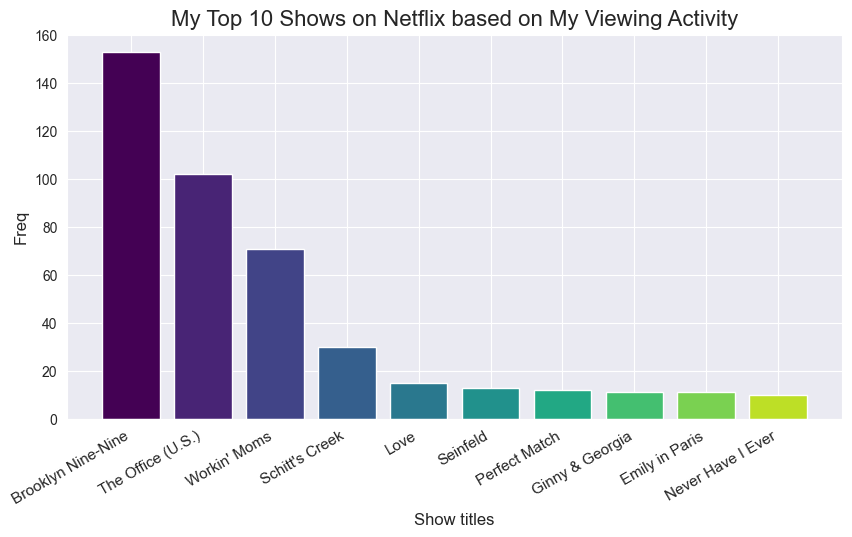

In [94]:
import matplotlib.pyplot as plt
import numpy as np
N = len(top_views)
x = np.arange(N)
colors = plt.get_cmap('viridis')
plt.figure(figsize=(10,5))
plt.bar(top_views.index, top_views.values, color=colors(x/N))
plt.ylabel("Freq", fontsize=12)
plt.xlabel("Show titles", fontsize=12)
plt.xticks(rotation=30, ha="right", fontsize=11)
plt.title("My Top 10 Shows on Netflix based on My Viewing Activity", fontsize=16)
plt.savefig("top 10 shows bar.png", dpi=300, bbox_inches='tight')
plt.show()

In [101]:
from datetime import datetime
df['date'] = pd.to_datetime(df['Date'])
df['day'] = [d.strftime('%A') for d in df['date']]
df

/var/folders/9x/ktmdkxms6v1cxltsd97k_nmw0000gq/T/ipykernel_6705/1423294535.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['Date'])


,Title,Date,show_title,date,day
0,Old Dads,22/10/23,Old Dads,2023-10-22,Sunday
1,Love at First Sight,20/10/23,Love at First Sight,2023-10-20,Friday
2,Workin' Moms: Season 7: Ohmygodohmygodohmygod,20/10/23,Workin' Moms,2023-10-20,Friday
3,Inventing Anna: Limited Series: Dangerously Close,19/10/23,Inventing Anna,2023-10-19,Thursday
4,Inventing Anna: Limited Series: Too Rich for H...,17/10/23,Inventing Anna,2023-10-17,Tuesday
...,...,...,...,...,...
584,The Office (U.S.): Season 3: The Convict,26/10/22,The Office (U.S.),2022-10-26,Wednesday
585,The Office (U.S.): Season 3: The Merger,26/10/22,The Office (U.S.),2022-10-26,Wednesday
586,The Office (U.S.): Season 3: Branch Closing,26/10/22,The Office (U.S.),2022-10-26,Wednesday
587,The Office (U.S.): Season 3: Diwali,26/10/22,The Office (U.S.),2022-10-26,Wednesday


In [102]:
# Assuming you have a DataFrame and the list of days in 'cats'
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Use pd.Categorical to categorically order the 'day' column
df['day'] = pd.Categorical(df['day'], categories=cats, ordered=True)

# Sort the DataFrame by 'day', count occurrences, and sort by index
by_day = df.sort_values('day')['day'].value_counts().sort_index()

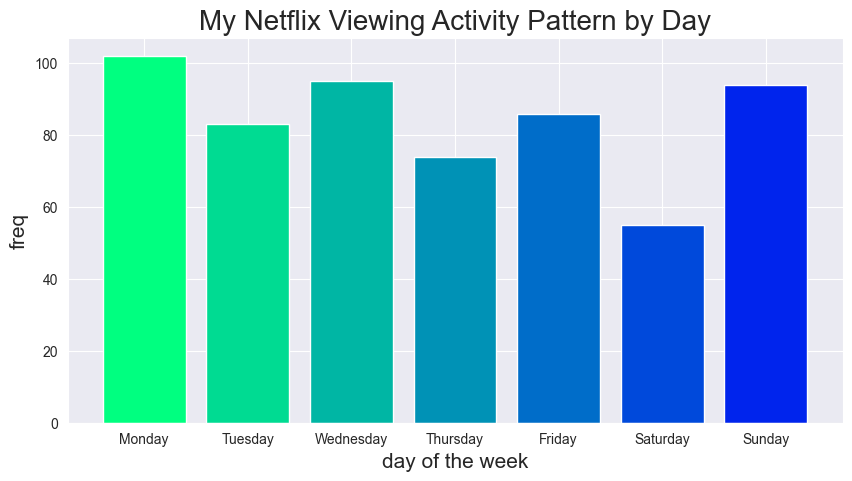

In [103]:
import seaborn as sns

# Set the Seaborn style
sns.set_style('darkgrid')

N = len(by_day)
x = np.arange(N)
colors = plt.get_cmap('winter').reversed()
plt.figure(figsize=(10, 5))
plt.bar(by_day.index, by_day.values, color=colors(x / N))
plt.title("My Netflix Viewing Activity Pattern by Day", fontsize=20)
plt.xlabel("day of the week", fontsize=15)
plt.ylabel("freq", fontsize=15)
plt.savefig("freq by day.png", dpi=300, bbox_inches='tight')
plt.show()

# This stuff even I didn't understand properly, chatgpt for lyf!